In [129]:
import pandas as pd
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA', FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA', FutureWarning)

ascii_cup ="""\
    (  )   (   )  )
     ) (   )  (  (
     ( )  (    ) )
     _____________
    <_____________> ___
    |             |/ _ \\
    |               | | |
    |               |_| |
 ___|             |\___/
/    \___________/    \\
\_____________________/
"""

In [130]:
# df = read_csv('Actual_data.csv' , header=0, index_col=0, parse_dates=['datetime_beginning_ept'])


series_past = read_csv('Past_data.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series_current = read_csv('Actual_data.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

training = series_past.values
testing = series_current.values

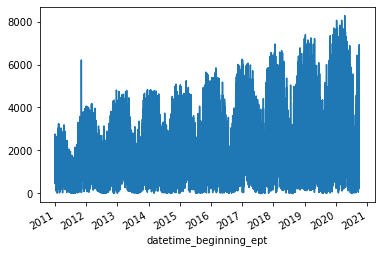

In [131]:
series_past.plot()
pyplot.show()

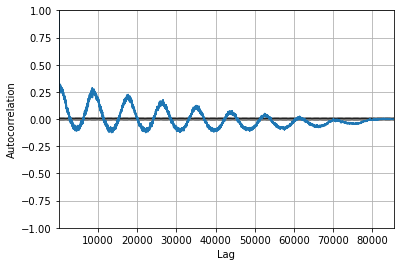

In [132]:
autocorrelation_plot(series_past)
pyplot.show()

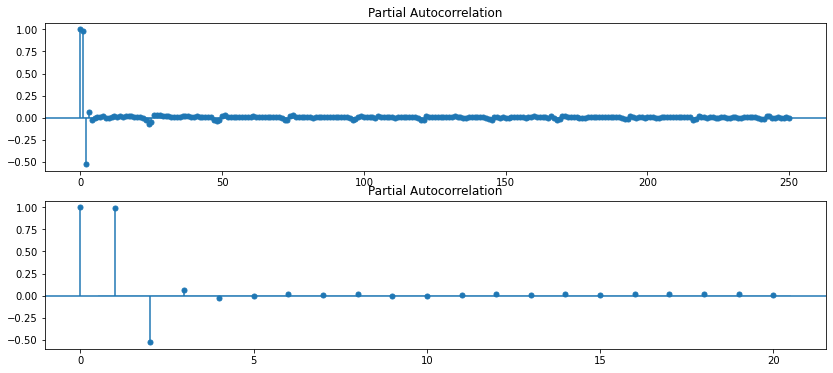

In [133]:
# got this code from: https://www.kaggle.com/sumi25/understand-arima-and-tune-p-d-q
fig = pyplot.figure(figsize=(14,6))
#
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_pacf(series_past, lags=250, ax=ax1)
#
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(series_past, lags=20, ax=ax2)



In [134]:
# lag of 3 is determined from the PACF figure
model = ARIMA(training, order=(3,1,0))
model_fit = model.fit(disp=0)

# print(model_fit.summary())

output = model_fit.forecast()


In [135]:
# training array to list
training_history = [x for x in training]
#shrinking our history from over 85,000, down to a more reasonable number...
training_history = training_history[len(training_history)-20:]

#create predictions list
predictions = []


In [136]:
print("This needs to run through", len(testing), "comparisons.")
print("Go get a cup of tea.\n")
print(ascii_cup)
for i in range(len(testing)):
    model = ARIMA(training_history, order=(3,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    observation = testing[i]
    training_history.append(observation)
    print(i+1,".) ", sep='',end='')
    print('predicted=%f, expected=%f' % (yhat, observation))
 

This needs to run through 1465 comparisons.
Go get a cup of tea.

    (  )   (   )  )
     ) (   )  (  (
     ( )  (    ) )
     _____________
    <_____________> ___
    |             |/ _ \
    |               | | |
    |               |_| |
 ___|             |\___/
/    \___________/    \
\_____________________/

1.) predicted=4734.771218, expected=4313.835000
2.) predicted=3903.094277, expected=4020.880000
3.) predicted=3814.381908, expected=3392.648000
4.) predicted=2998.435454, expected=3032.200000
5.) predicted=3026.369797, expected=2866.706000
6.) predicted=2849.935060, expected=2999.535000
7.) predicted=3100.739840, expected=2836.620000
8.) predicted=2546.998296, expected=2833.511000
9.) predicted=2811.761124, expected=2582.735000
10.) predicted=2318.179625, expected=1934.796000
11.) predicted=1489.155262, expected=2252.111000
12.) predicted=2677.720956, expected=2531.116000
13.) predicted=2499.958997, expected=3330.958000
14.) predicted=3543.633160, expected=3983.141000
15.) 

163.) predicted=4364.038029, expected=3528.962000
164.) predicted=2696.193099, expected=2981.220000
165.) predicted=2952.195204, expected=2715.574000
166.) predicted=2708.204197, expected=2478.503000
167.) predicted=2377.243757, expected=2217.168000
168.) predicted=2079.402506, expected=2146.426000
169.) predicted=2163.182684, expected=1770.476000
170.) predicted=1494.227180, expected=1365.850000
171.) predicted=1149.610115, expected=1084.623000
172.) predicted=978.339554, expected=968.026000
173.) predicted=954.393988, expected=819.958000
174.) predicted=730.565227, expected=837.342000
175.) predicted=882.691093, expected=838.014000
176.) predicted=823.240209, expected=818.764000
177.) predicted=789.786073, expected=870.236000
178.) predicted=902.570638, expected=896.160000
179.) predicted=888.747290, expected=910.973000
180.) predicted=900.900363, expected=1078.768000
181.) predicted=1191.997074, expected=1177.005000
182.) predicted=1192.457017, expected=1128.349000
183.) predicted=1

328.) predicted=6327.189322, expected=6410.069000
329.) predicted=6527.381973, expected=6467.541000
330.) predicted=6472.576666, expected=6334.630000
331.) predicted=6234.238671, expected=6303.372000
332.) predicted=6332.217071, expected=5944.390000
333.) predicted=5663.055354, expected=5928.017000
334.) predicted=6035.873263, expected=6261.096000
335.) predicted=6488.592866, expected=6664.147000
336.) predicted=6861.279473, expected=6236.778000
337.) predicted=5800.698691, expected=5991.945000
338.) predicted=5993.835044, expected=5012.419000
339.) predicted=4303.069367, expected=5369.713000
340.) predicted=5920.941191, expected=6166.060000
341.) predicted=6571.616887, expected=6489.730000
342.) predicted=6506.393179, expected=6536.173000
343.) predicted=6532.749232, expected=6081.946000
344.) predicted=5752.051791, expected=5960.006000
345.) predicted=6017.495886, expected=6070.902000
346.) predicted=6158.581127, expected=5616.573000
347.) predicted=5232.508039, expected=5439.236000


493.) predicted=845.212773, expected=801.137000
494.) predicted=739.339889, expected=642.259000
495.) predicted=545.723203, expected=601.848000
496.) predicted=599.671452, expected=480.106000
497.) predicted=388.365785, expected=425.596000
498.) predicted=413.681492, expected=401.458000
499.) predicted=386.166967, expected=374.996000
500.) predicted=354.045148, expected=596.922000
501.) predicted=756.642211, expected=1384.795000
502.) predicted=1879.982550, expected=1645.651000
503.) predicted=1616.754487, expected=1751.120000
504.) predicted=1803.429328, expected=2131.097000
505.) predicted=2388.410274, expected=1862.587000
506.) predicted=1566.769129, expected=1581.451000
507.) predicted=1481.152398, expected=1693.028000
508.) predicted=1829.724564, expected=1904.336000
509.) predicted=1998.654570, expected=1564.444000
510.) predicted=1265.981863, expected=1481.989000
511.) predicted=1532.916432, expected=1687.866000
512.) predicted=1828.398693, expected=2220.960000
513.) predicted=2

660.) predicted=1254.297245, expected=1150.567000
661.) predicted=1043.075166, expected=877.463000
662.) predicted=722.260163, expected=687.567000
663.) predicted=610.871917, expected=828.760000
664.) predicted=958.227640, expected=892.001000
665.) predicted=873.722801, expected=782.558000
666.) predicted=694.834430, expected=658.305000
667.) predicted=604.780470, expected=519.309000
668.) predicted=443.655674, expected=467.663000
669.) predicted=457.463492, expected=441.678000
670.) predicted=422.095697, expected=357.723000
671.) predicted=297.012544, expected=423.233000
672.) predicted=489.201016, expected=367.008000
673.) predicted=295.606282, expected=268.848000
674.) predicted=217.879128, expected=466.563000
675.) predicted=628.419566, expected=601.081000
676.) predicted=624.872807, expected=1023.854000
677.) predicted=1300.069971, expected=2272.765000
678.) predicted=3053.002939, expected=3540.777000
679.) predicted=4118.427594, expected=4146.517000
680.) predicted=4317.059381, e

825.) predicted=6740.101613, expected=6619.004000
826.) predicted=6535.491917, expected=6011.827000
827.) predicted=5589.108687, expected=4579.698000
828.) predicted=3679.074694, expected=3729.316000
829.) predicted=3481.566026, expected=3479.313000
830.) predicted=3408.175538, expected=3423.088000
831.) predicted=3367.871600, expected=4320.836000
832.) predicted=4991.660667, expected=4980.884000
833.) predicted=5186.655758, expected=5518.626000
834.) predicted=5804.749800, expected=5407.161000
835.) predicted=5216.372520, expected=5533.996000
836.) predicted=5716.689202, expected=6013.419000
837.) predicted=6324.112374, expected=6302.097000
838.) predicted=6380.934957, expected=6553.724000
839.) predicted=6700.234635, expected=6754.452000
840.) predicted=6855.583512, expected=6641.894000
841.) predicted=6518.933025, expected=6378.319000
842.) predicted=6235.238737, expected=6252.814000
843.) predicted=6230.734923, expected=6259.609000
844.) predicted=6278.765611, expected=6157.658000


990.) predicted=5188.954074, expected=5013.225000
991.) predicted=4812.208422, expected=4667.481000
992.) predicted=4475.474575, expected=4143.984000
993.) predicted=3811.807461, expected=3742.111000
994.) predicted=3566.031255, expected=3361.688000
995.) predicted=3143.030714, expected=2888.592000
996.) predicted=2602.644902, expected=2136.023000
997.) predicted=1663.722170, expected=1693.170000
998.) predicted=1545.253996, expected=1317.466000
999.) predicted=1089.055839, expected=1005.503000
1000.) predicted=837.121572, expected=792.582000
1001.) predicted=687.420427, expected=802.970000
1002.) predicted=846.209734, expected=555.398000
1003.) predicted=333.905895, expected=391.900000
1004.) predicted=344.949278, expected=464.431000
1005.) predicted=546.362504, expected=489.862000
1006.) predicted=466.031555, expected=516.954000
1007.) predicted=535.192069, expected=616.660000
1008.) predicted=686.009403, expected=667.956000
1009.) predicted=675.781881, expected=909.686000
1010.) pre

1152.) predicted=2609.428445, expected=2443.366000
1153.) predicted=2300.319546, expected=2203.778000
1154.) predicted=2067.987633, expected=2139.171000
1155.) predicted=2141.425000, expected=2315.043000
1156.) predicted=2444.438037, expected=2701.776000
1157.) predicted=2937.668181, expected=2941.155000
1158.) predicted=3022.166874, expected=3140.147000
1159.) predicted=3259.655981, expected=3647.697000
1160.) predicted=4003.767518, expected=4405.385000
1161.) predicted=4854.222995, expected=5190.170000
1162.) predicted=5615.945229, expected=5527.794000
1163.) predicted=5624.297503, expected=5384.212000
1164.) predicted=5250.799066, expected=5539.175000
1165.) predicted=5742.954474, expected=5789.633000
1166.) predicted=5919.110876, expected=5902.458000
1167.) predicted=5927.612809, expected=6156.104000
1168.) predicted=6345.469255, expected=6290.045000
1169.) predicted=6326.136680, expected=6303.114000
1170.) predicted=6299.014468, expected=6080.960000
1171.) predicted=5919.018985, e

1313.) predicted=4612.027446, expected=4844.602000
1314.) predicted=4998.540621, expected=4850.455000
1315.) predicted=4815.313934, expected=5414.578000
1316.) predicted=5864.173623, expected=5679.958000
1317.) predicted=5712.562513, expected=5783.362000
1318.) predicted=5845.222151, expected=6352.126000
1319.) predicted=6788.485711, expected=6916.391000
1320.) predicted=7189.062555, expected=7187.464000
1321.) predicted=7288.930380, expected=6790.214000
1322.) predicted=6465.407413, expected=6078.884000
1323.) predicted=5682.902413, expected=5339.778000
1324.) predicted=4942.911058, expected=5455.309000
1325.) predicted=5692.941575, expected=4916.467000
1326.) predicted=4384.722181, expected=3807.000000
1327.) predicted=3130.143845, expected=3228.675000
1328.) predicted=3061.893048, expected=3269.779000
1329.) predicted=3350.627481, expected=3219.729000
1330.) predicted=3099.644495, expected=3255.270000
1331.) predicted=3302.227803, expected=3034.400000
1332.) predicted=2846.543826, e

In [137]:

RMSE = sqrt(mean_squared_error(testing, predictions))
print('Test RMSE: %.3f' % RMSE)

# Training history of 07(lag=3): RMSE=300.809
# Training history of 20(lag=3): RMSE=299.797
# Training history of 50(lag=3): RMSE=299.797

# Lag=4+, 'Did not converge'
# Lag=3, RMSE=299.797
# Lag=2, RMSE=300.819

Test RMSE: 299.797


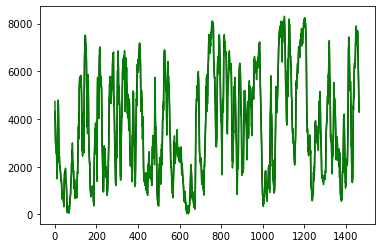

In [147]:
pyplot.plot(testing, color='black')
pyplot.plot(predictions, color='green')

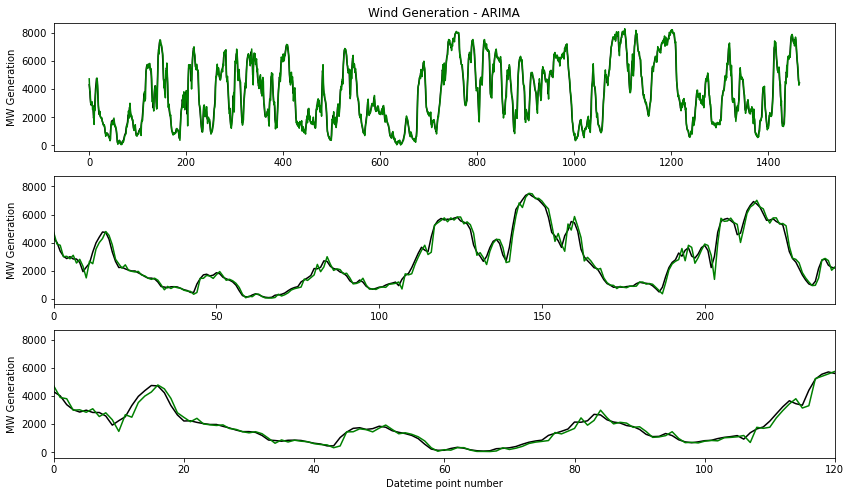

In [170]:
plot = pyplot.figure(figsize=(14,8))

ax1 = plot.add_subplot(311)
pyplot.plot(testing, color='black')
pyplot.plot(predictions, color='green')
pyplot.ylabel('MW Generation')
pyplot.title('Wind Generation - ARIMA')
#
ax2 = plot.add_subplot(312)
pyplot.plot(testing, color='black')
pyplot.plot(predictions, color='green')
ax2.set_xlim([0, 240])
pyplot.ylabel('MW Generation')

#
ax3 = plot.add_subplot(313)
pyplot.plot(testing, color='black')
pyplot.plot(predictions, color='green')
ax3.set_xlim([0, 120])
pyplot.xlabel('Datetime point number')
pyplot.ylabel('MW Generation')

pyplot.savefig('ARIMA_Graph.png')
